# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install gensim
# install NLTK: Natural Language tool kit
!{sys.executable} -m pip install nltk

# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!{sys.executable} -m pip install gensim

# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [2]:
# load the stock news data
stock_df = pd.read_csv("Amazon.csv")

In [3]:
# Let's view the dataset 
stock_df

Unnamed: 0           Created_at              User_id  \
0             0  2022-02-04 09:20:46           2838885389   
1             1  2022-02-04 09:05:12           2838885389   
2             2  2022-02-04 08:59:01           2838885389   
3             3  2022-02-04 08:52:59   912945358921232384   
4             4  2022-02-04 08:44:55           4419993470   
..          ...                  ...                  ...   
149         149  2022-02-02 21:30:50  1162775438281891840   
150         150  2022-02-02 21:08:13              1940581   
151         151  2022-02-02 20:30:16            383938754   
152         152  2022-02-02 18:04:13  1336247731589885955   
153         153  2022-02-02 17:57:48             58554518   

                                                Tweets  Subjectivity  \
0    In record net income quarter super rich Bezos ...      0.469444   
1    WHY Amazon hiking Prime membership fee U S ONL...      0.183333   
2    Amazon earned 14 3 billion quarter DOUBLE net ...      0.308333   
3    Dogecola first crypto drink unites world cryot...      0.333333   
4    GLOBAL MARKETS Amazon help stock steady prospe...      0.250000   
..                                                 ...           ...   
149  T2H291 Men Indiglo Easy Reader White Dial Leat...      0.416667   
150  Stay ahead crowd future healthcare digital hea...      0.145833   
151  Those continue successful people paid attentio...      0.443750   
152  It 19 000 employee This number manageable may ...      0.425000   
153      Every model AirPods sale Amazon right Trends       0.535714   

     Polarity  Sentiment  
0    0.184722          1  
1    0.050000          1  
2    0.112500          1  
3    0.362500          1  
4    0.083333          1  
..        ...        ...  
149  0.216667          1  
150 -0.033333          0  
151  0.087500          1  
152  0.400000          1  
153  0.285714          1  

[154 rows x 7 columns]

In [4]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    154 non-null    int64  
 1   Created_at    154 non-null    object 
 2   User_id       154 non-null    int64  
 3   Tweets        154 non-null    object 
 4   Subjectivity  154 non-null    float64
 5   Polarity      154 non-null    float64
 6   Sentiment     154 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 8.5+ KB


In [5]:
# check for null values
stock_df.isnull().sum()

Unnamed: 0      0
Created_at      0
User_id         0
Tweets          0
Subjectivity    0
Polarity        0
Sentiment       0
dtype: int64

**How many unique elements are present in the 'sentiment' column?**

# TASK #3: PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
Test = '$I love NCHK CODE & Machine learning!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love NCHK CODE  Machine learning'

In [8]:
Test = 'Good morning beautiful people :)... #I am having fun learning Trading with Python!!'

In [9]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'T',
 'r',
 'a',
 'd',
 'i',
 'n',
 'g',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'P',
 'y',
 't',
 'h',
 'o',
 'n']

In [10]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Trading with Python'

In [11]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [12]:
# Let's remove punctuations from our dataset 
stock_df['Text Without Punctuation'] = stock_df['Tweets'].apply(remove_punc)

In [13]:
stock_df.head(3)

Unnamed: 0           Created_at     User_id  \
0           0  2022-02-04 09:20:46  2838885389   
1           1  2022-02-04 09:05:12  2838885389   
2           2  2022-02-04 08:59:01  2838885389   

                                              Tweets  Subjectivity  Polarity  \
0  In record net income quarter super rich Bezos ...      0.469444  0.184722   
1  WHY Amazon hiking Prime membership fee U S ONL...      0.183333  0.050000   
2  Amazon earned 14 3 billion quarter DOUBLE net ...      0.308333  0.112500   

   Sentiment                           Text Without Punctuation  
0          1  In record net income quarter super rich Bezos ...  
1          1  WHY Amazon hiking Prime membership fee U S ONL...  
2          1  Amazon earned 14 3 billion quarter DOUBLE net ...

In [14]:
stock_df['Tweets'][2]

'Amazon earned 14 3 billion quarter DOUBLE net income year earlier Woke OWNER Jeff Bezos worth hundred BILLIONS decided rich enough time increase obscene wealth hiking Prime membership fee '

In [15]:
stock_df['Text Without Punctuation'][2]

'Amazon earned 14 3 billion quarter DOUBLE net income year earlier Woke OWNER Jeff Bezos worth hundred BILLIONS decided rich enough time increase obscene wealth hiking Prime membership fee '

# TASK #4: PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [16]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])
# stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [18]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [19]:
# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [20]:
stock_df['Tweets'][0]

'In record net income quarter super rich Bezos increasing Amazon Prime fee U S ONLY HOW MUCH Amazon getting corp subsidy COVID FROM US TAXPAYERS When Corp GREED TOO MUCH '

In [21]:
stock_df['Text Without Punc & Stopwords'][0]

['record',
 'net',
 'income',
 'quarter',
 'super',
 'rich',
 'bezos',
 'increasing',
 'amazon',
 'prime',
 'fee',
 'much',
 'amazon',
 'getting',
 'corp',
 'subsidy',
 'covid',
 'taxpayers',
 'corp',
 'greed',
 'much']

In [22]:
# join the words into a string
# stock_df['Processed Text 2'] = stock_df['Processed Text 2'].apply(lambda x: " ".join(x))

In [23]:
stock_df

Unnamed: 0           Created_at              User_id  \
0             0  2022-02-04 09:20:46           2838885389   
1             1  2022-02-04 09:05:12           2838885389   
2             2  2022-02-04 08:59:01           2838885389   
3             3  2022-02-04 08:52:59   912945358921232384   
4             4  2022-02-04 08:44:55           4419993470   
..          ...                  ...                  ...   
149         149  2022-02-02 21:30:50  1162775438281891840   
150         150  2022-02-02 21:08:13              1940581   
151         151  2022-02-02 20:30:16            383938754   
152         152  2022-02-02 18:04:13  1336247731589885955   
153         153  2022-02-02 17:57:48             58554518   

                                                Tweets  Subjectivity  \
0    In record net income quarter super rich Bezos ...      0.469444   
1    WHY Amazon hiking Prime membership fee U S ONL...      0.183333   
2    Amazon earned 14 3 billion quarter DOUBLE net ...      0.308333   
3    Dogecola first crypto drink unites world cryot...      0.333333   
4    GLOBAL MARKETS Amazon help stock steady prospe...      0.250000   
..                                                 ...           ...   
149  T2H291 Men Indiglo Easy Reader White Dial Leat...      0.416667   
150  Stay ahead crowd future healthcare digital hea...      0.145833   
151  Those continue successful people paid attentio...      0.443750   
152  It 19 000 employee This number manageable may ...      0.425000   
153      Every model AirPods sale Amazon right Trends       0.535714   

     Polarity  Sentiment                           Text Without Punctuation  \
0    0.184722          1  In record net income quarter super rich Bezos ...   
1    0.050000          1  WHY Amazon hiking Prime membership fee U S ONL...   
2    0.112500          1  Amazon earned 14 3 billion quarter DOUBLE net ...   
3    0.362500          1  Dogecola first crypto drink unites world cryot...   
4    0.083333          1  GLOBAL MARKETS Amazon help stock steady prospe...   
..        ...        ...                                                ...   
149  0.216667          1  T2H291 Men Indiglo Easy Reader White Dial Leat...   
150 -0.033333          0  Stay ahead crowd future healthcare digital hea...   
151  0.087500          1  Those continue successful people paid attentio...   
152  0.400000          1  It 19 000 employee This number manageable may ...   
153  0.285714          1      Every model AirPods sale Amazon right Trends    

                         Text Without Punc & Stopwords  
0    [record, net, income, quarter, super, rich, be...  
1    [amazon, hiking, prime, membership, fee, amazo...  
2    [amazon, earned, billion, quarter, double, net...  
3    [dogecola, first, crypto, drink, unites, world...  
4    [global, markets, amazon, help, steady, prospe...  
..                                                 ...  
149  [men, indiglo, easy, reader, white, dial, leat...  
150  [stay, ahead, crowd, future, healthcare, digit...  
151  [continue, successful, people, paid, attention...  
152  [employee, number, manageable, may, take, big,...  
153  [every, model, airpods, sale, amazon, right, t...  

[154 rows x 9 columns]

**?**

- **Modify the code in order keep words that are longer than or equal 2 characters instead of 3**
- **Add 'https' to the list of stopwords and rerun the code**



# TASK #5: PLOT WORDCLOUD

In [24]:
# join the words into a string
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

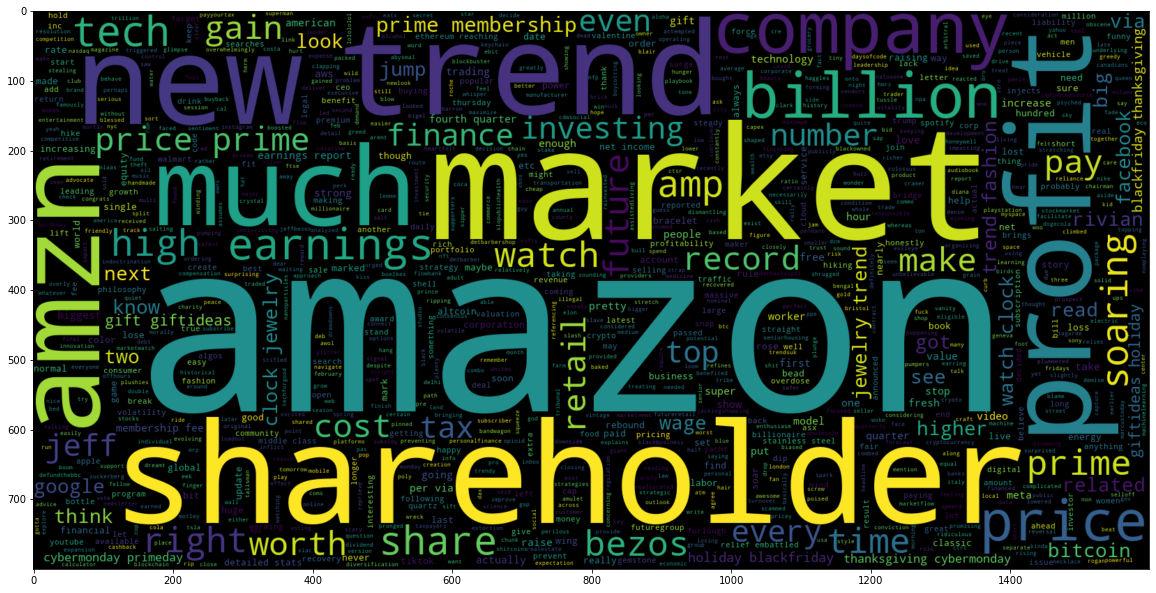

In [25]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

**MINI CHALLENGE #4:**
- **Visualize the wordcloud for tweets that have negative sentiment**

# TASK #6: VISUALIZE CLEANED DATASETS

In [26]:
stock_df

Unnamed: 0           Created_at              User_id  \
0             0  2022-02-04 09:20:46           2838885389   
1             1  2022-02-04 09:05:12           2838885389   
2             2  2022-02-04 08:59:01           2838885389   
3             3  2022-02-04 08:52:59   912945358921232384   
4             4  2022-02-04 08:44:55           4419993470   
..          ...                  ...                  ...   
149         149  2022-02-02 21:30:50  1162775438281891840   
150         150  2022-02-02 21:08:13              1940581   
151         151  2022-02-02 20:30:16            383938754   
152         152  2022-02-02 18:04:13  1336247731589885955   
153         153  2022-02-02 17:57:48             58554518   

                                                Tweets  Subjectivity  \
0    In record net income quarter super rich Bezos ...      0.469444   
1    WHY Amazon hiking Prime membership fee U S ONL...      0.183333   
2    Amazon earned 14 3 billion quarter DOUBLE net ...      0.308333   
3    Dogecola first crypto drink unites world cryot...      0.333333   
4    GLOBAL MARKETS Amazon help stock steady prospe...      0.250000   
..                                                 ...           ...   
149  T2H291 Men Indiglo Easy Reader White Dial Leat...      0.416667   
150  Stay ahead crowd future healthcare digital hea...      0.145833   
151  Those continue successful people paid attentio...      0.443750   
152  It 19 000 employee This number manageable may ...      0.425000   
153      Every model AirPods sale Amazon right Trends       0.535714   

     Polarity  Sentiment                           Text Without Punctuation  \
0    0.184722          1  In record net income quarter super rich Bezos ...   
1    0.050000          1  WHY Amazon hiking Prime membership fee U S ONL...   
2    0.112500          1  Amazon earned 14 3 billion quarter DOUBLE net ...   
3    0.362500          1  Dogecola first crypto drink unites world cryot...   
4    0.083333          1  GLOBAL MARKETS Amazon help stock steady prospe...   
..        ...        ...                                                ...   
149  0.216667          1  T2H291 Men Indiglo Easy Reader White Dial Leat...   
150 -0.033333          0  Stay ahead crowd future healthcare digital hea...   
151  0.087500          1  Those continue successful people paid attentio...   
152  0.400000          1  It 19 000 employee This number manageable may ...   
153  0.285714          1      Every model AirPods sale Amazon right Trends    

                         Text Without Punc & Stopwords  \
0    [record, net, income, quarter, super, rich, be...   
1    [amazon, hiking, prime, membership, fee, amazo...   
2    [amazon, earned, billion, quarter, double, net...   
3    [dogecola, first, crypto, drink, unites, world...   
4    [global, markets, amazon, help, steady, prospe...   
..                                                 ...   
149  [men, indiglo, easy, reader, white, dial, leat...   
150  [stay, ahead, crowd, future, healthcare, digit...   
151  [continue, successful, people, paid, attention...   
152  [employee, number, manageable, may, take, big,...   
153  [every, model, airpods, sale, amazon, right, t...   

                  Text Without Punc & Stopwords Joined  
0    record net income quarter super rich bezos inc...  
1    amazon hiking prime membership fee amazon reco...  
2    amazon earned billion quarter double net incom...  
3    dogecola first crypto drink unites world cryot...  
4    global markets amazon help steady prospect rat...  
..                                                 ...  
149  men indiglo easy reader white dial leather ban...  
150  stay ahead crowd future healthcare digital hea...  
151  continue successful people paid attention tren...  
152  employee number manageable may take big hit gr...  
153       every model airpods sale amazon right trends  

[154 rows x 10 columns]

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# word_tokenize is used to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

record net income quarter super rich bezos increasing amazon prime fee much amazon getting corp subsidy covid taxpayers corp greed much
['record', 'net', 'income', 'quarter', 'super', 'rich', 'bezos', 'increasing', 'amazon', 'prime', 'fee', 'much', 'amazon', 'getting', 'corp', 'subsidy', 'covid', 'taxpayers', 'corp', 'greed', 'much']


In [29]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in stock_df['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 34


In [30]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]
tweets_length

[21,
 22,
 26,
 19,
 13,
 24,
 12,
 10,
 5,
 16,
 23,
 20,
 23,
 14,
 13,
 26,
 13,
 27,
 17,
 15,
 14,
 16,
 6,
 8,
 11,
 8,
 20,
 12,
 3,
 27,
 23,
 22,
 11,
 17,
 25,
 17,
 24,
 9,
 32,
 6,
 19,
 23,
 10,
 25,
 10,
 26,
 30,
 27,
 27,
 10,
 31,
 21,
 30,
 22,
 11,
 19,
 27,
 23,
 25,
 25,
 24,
 15,
 29,
 25,
 27,
 17,
 6,
 13,
 17,
 6,
 11,
 8,
 27,
 9,
 15,
 15,
 21,
 3,
 31,
 17,
 26,
 22,
 18,
 14,
 21,
 20,
 14,
 21,
 10,
 12,
 24,
 34,
 12,
 18,
 23,
 9,
 17,
 10,
 7,
 13,
 15,
 28,
 7,
 29,
 18,
 26,
 8,
 27,
 24,
 14,
 17,
 12,
 10,
 22,
 11,
 20,
 29,
 10,
 22,
 34,
 22,
 9,
 10,
 21,
 19,
 21,
 21,
 16,
 25,
 8,
 15,
 23,
 24,
 20,
 25,
 20,
 17,
 26,
 17,
 23,
 25,
 23,
 20,
 23,
 23,
 26,
 19,
 22,
 5,
 23,
 21,
 19,
 19,
 7]

In [31]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

**?**
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments class**

# TASK #7: PREPARE THE DATA BY TOKENIZING AND PADDING

In [32]:
stock_df.head(3)

Unnamed: 0           Created_at     User_id  \
0           0  2022-02-04 09:20:46  2838885389   
1           1  2022-02-04 09:05:12  2838885389   
2           2  2022-02-04 08:59:01  2838885389   

                                              Tweets  Subjectivity  Polarity  \
0  In record net income quarter super rich Bezos ...      0.469444  0.184722   
1  WHY Amazon hiking Prime membership fee U S ONL...      0.183333  0.050000   
2  Amazon earned 14 3 billion quarter DOUBLE net ...      0.308333  0.112500   

   Sentiment                           Text Without Punctuation  \
0          1  In record net income quarter super rich Bezos ...   
1          1  WHY Amazon hiking Prime membership fee U S ONL...   
2          1  Amazon earned 14 3 billion quarter DOUBLE net ...   

                       Text Without Punc & Stopwords  \
0  [record, net, income, quarter, super, rich, be...   
1  [amazon, hiking, prime, membership, fee, amazo...   
2  [amazon, earned, billion, quarter, double, net...   

                Text Without Punc & Stopwords Joined  
0  record net income quarter super rich bezos inc...  
1  amazon hiking prime membership fee amazon reco...  
2  amazon earned billion quarter double net incom...

In [33]:
# Obtain the total words present in the dataset
list_of_words = []
for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)


In [34]:
list_of_words

['record',
 'net',
 'income',
 'quarter',
 'super',
 'rich',
 'bezos',
 'increasing',
 'amazon',
 'prime',
 'fee',
 'much',
 'amazon',
 'getting',
 'corp',
 'subsidy',
 'covid',
 'taxpayers',
 'corp',
 'greed',
 'much',
 'amazon',
 'hiking',
 'prime',
 'membership',
 'fee',
 'amazon',
 'record',
 'profit',
 'quarter',
 'bezos',
 'net',
 'worth',
 'hundreds',
 'billions',
 'financial',
 'equity',
 'get',
 'richer',
 'back',
 'middle',
 'class',
 'americans',
 'amazon',
 'earned',
 'billion',
 'quarter',
 'double',
 'net',
 'income',
 'earlier',
 'woke',
 'owner',
 'jeff',
 'bezos',
 'worth',
 'hundred',
 'billions',
 'decided',
 'rich',
 'enough',
 'time',
 'increase',
 'obscene',
 'wealth',
 'hiking',
 'prime',
 'membership',
 'fee',
 'dogecola',
 'first',
 'crypto',
 'drink',
 'unites',
 'world',
 'cryoto',
 'real',
 'world',
 'code',
 'bottle',
 'win',
 'nft',
 'drink',
 'made',
 'italy',
 'soon',
 'also',
 'amazon',
 'global',
 'markets',
 'amazon',
 'help',
 'steady',
 'prospect',


In [35]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

1312

In [36]:
# split the data into test and train 
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
X_train.shape

(123,)

In [38]:
X_test.shape

(31,)

In [39]:
X_train

140    [machine, learning, service, mlaas, market, fu...
141    [women, crystal, watch, collection, blue, crys...
112    [amazon, prime, subscription, become, expensiv...
149    [men, indiglo, easy, reader, white, dial, leat...
5      [amazon, soar, commo, demand, honeywell, dip, ...
                             ...                        
20     [amazon, raising, price, prime, per, via, jeff...
0      [record, net, income, quarter, super, rich, be...
8                  [like, prime, subscriber, foot, bill]
37     [amazon, amzn, ripping, solid, earnings, repor...
83     [stand, people, sap, enthusiasm, vitality, hea...
Name: Text Without Punc & Stopwords, Length: 123, dtype: object

In [40]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [41]:
train_sequences

[[375,
  376,
  194,
  377,
  2,
  17,
  34,
  61,
  378,
  379,
  18,
  1,
  380,
  381,
  382,
  383,
  195,
  384,
  196,
  385,
  386,
  387,
  388,
  389,
  24],
 [197,
  198,
  11,
  390,
  199,
  105,
  200,
  105,
  106,
  105,
  11,
  43,
  35,
  5,
  21,
  1,
  25,
  44,
  26,
  45,
  46,
  47,
  48],
 [1, 3, 107, 391, 392, 14, 24, 19, 15, 5],
 [393,
  394,
  201,
  395,
  396,
  397,
  398,
  399,
  400,
  11,
  11,
  43,
  35,
  5,
  21,
  1,
  25,
  44,
  26,
  45,
  46,
  47,
  48],
 [1,
  401,
  402,
  403,
  404,
  405,
  202,
  406,
  407,
  6,
  408,
  409,
  11,
  203,
  108,
  61,
  204,
  49,
  2,
  109,
  410,
  411,
  36,
  81],
 [205, 1, 206, 412, 62, 10],
 [2, 49, 110, 109, 17, 111, 19, 27, 112, 1, 7],
 [21,
  11,
  413,
  414,
  82,
  415,
  416,
  11,
  106,
  83,
  201,
  50,
  200,
  11,
  43,
  35,
  5,
  21,
  1,
  25,
  44,
  26,
  45,
  46,
  47,
  48],
 [10,
  417,
  28,
  51,
  63,
  84,
  10,
  418,
  8,
  4,
  14,
  207,
  208,
  10,
  113,
  114,
 

In [42]:
test_sequences

[[138,
  13,
  741,
  2,
  140,
  13,
  251,
  1,
  13,
  217,
  251,
  1,
  1023,
  23,
  111,
  628,
  111,
  97,
  19,
  22],
 [154, 545, 19, 836, 29, 254, 515, 2, 242, 7, 13, 158, 1, 69, 628, 545],
 [1, 1010, 761, 1012, 1, 4, 133, 360, 751, 78, 70, 866, 139],
 [31, 188, 51, 1, 142, 18, 29, 194, 3, 203, 87, 433, 864, 81, 685],
 [676, 1, 115, 551, 926, 5, 149, 123, 10, 926, 415, 16],
 [34, 744, 18, 338, 363, 655, 25, 761],
 [34, 195, 145, 781, 8, 1, 226, 472, 16, 195, 628, 628, 195, 251, 1089],
 [83, 238, 122, 140, 1015, 16, 13, 732, 1, 284, 5],
 [32, 675, 1, 4, 130, 78, 78, 58],
 [66, 16, 13, 1, 196, 481, 163, 16, 80, 768, 20, 9, 264, 80, 921, 4, 448],
 [1046, 1, 921, 204, 81, 176, 13, 806, 203, 448],
 [92,
  324,
  84,
  371,
  871,
  120,
  30,
  354,
  170,
  31,
  184,
  356,
  60,
  30,
  103,
  353,
  4,
  120,
  30,
  354,
  486,
  173,
  174,
  31,
  30,
  103,
  1],
 [1, 152, 620, 5, 123, 154, 1, 2, 154],
 [159, 5, 1, 157],
 [8, 4, 1, 2],
 [115, 259, 5, 322, 29, 433, 17, 28

In [43]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 141    [women, crystal, watch, collection, blue, crys...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [197, 198, 11, 390, 199, 105, 200, 105, 106, 105, 11, 43, 35, 5, 21, 1, 25, 44, 26, 45, 46, 47, 48]


In [44]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post')

In [45]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [375 376 194 377   2  17  34  61 378 379  18   1 380 381 382 383 195 384
 196 385 386 387 388 389  24   0   0   0   0]
The padded encoding for document: 2  is: [197 198  11 390 199 105 200 105 106 105  11  43  35   5  21   1  25  44
  26  45  46  47  48   0   0   0   0   0   0]
The padded encoding for document: 3  is: [  1   3 107 391 392  14  24  19  15   5   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]


In [46]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [47]:
y_train_cat.shape

(123, 2)

In [48]:
y_test_cat.shape

(31, 2)

In [49]:
y_train_cat

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

**?**

- **Change the padding length to 15 and rerun the code. Verify that padding was successful**


In [50]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

# TASK #9: BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

In [51]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         671744    
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1,492,354
Trainable params: 1,492,354
Non-trainable params: 0
_________________________________________________________________


In [52]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
4/4 [==============================] - 3s 252ms/step - loss: 0.6784 - acc: 0.6633 - val_loss: 0.6329 - val_acc: 0.6800
Epoch 2/2
4/4 [==============================] - 0s 70ms/step - loss: 0.5953 - acc: 0.7653 - val_loss: 0.5778 - val_acc: 0.6800


**?**
- **Train the model using different embedding output dimension**

# TASK #10: ASSESS TRAINED MODEL PERFORMANCE

In [53]:
# make prediction
pred = model.predict(padded_test)

In [54]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [55]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [56]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7096774193548387

<AxesSubplot:>

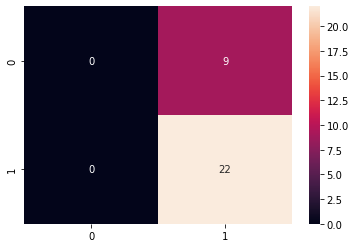

In [57]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)

**?**

- **Use a pretrained BERT model to make a sentiment analysis predictions**

# **EXTRA**

**1**

- **How many unique elements are present in the 'sentiment' column?**

C:\Users\Thu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Sentiment', ylabel='count'>

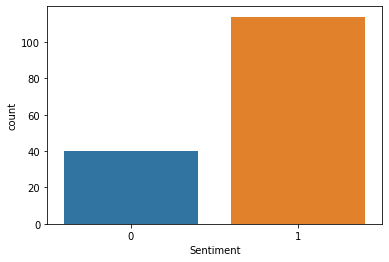

In [58]:
sns.countplot(stock_df['Sentiment'])

In [59]:
# Find the number of unique values in a particular column
stock_df['Sentiment'].nunique()

2

**2** 
- **Remove punctuations using a different method**


In [60]:
Test_punc_removed = []
for char in Test: 
    if char not in string.punctuation:
        Test_punc_removed.append(char)

# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Trading with Python'

**3**

- **Modify the code in order keep words that are longer than or equal 2 characters instead of 3**
- **Add 'https' to the list of stopwords and rerun the code**



In [61]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [62]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >= 2 and token not in stop_words:
            result.append(token)
            
    return result

**4**
- **Visualize the wordcloud for tweets that have negative sentiment**

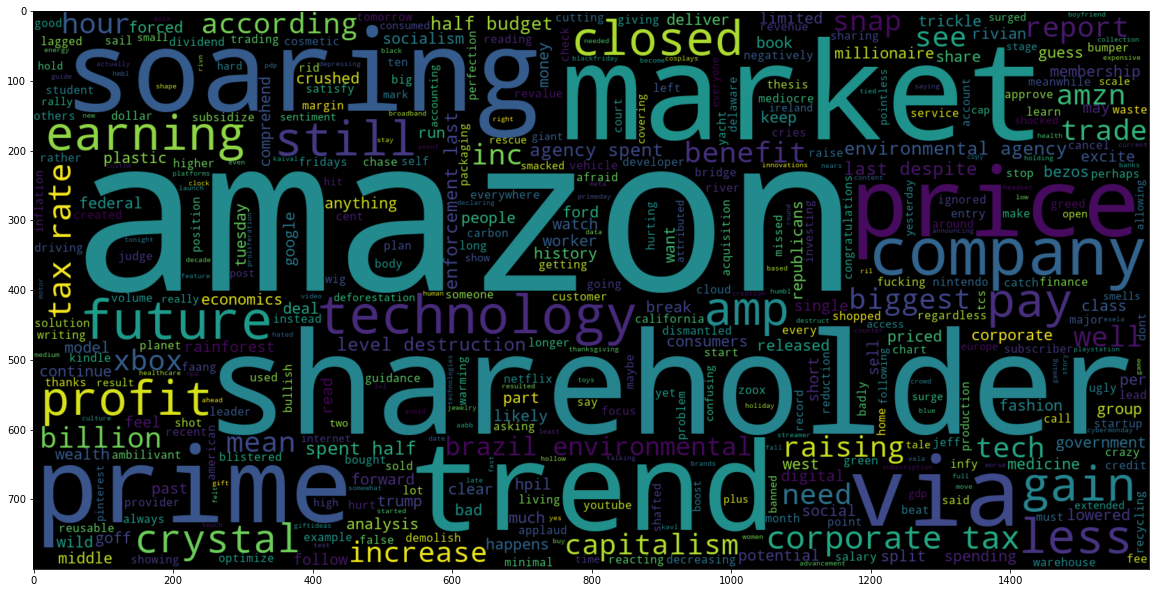

In [63]:
# plot the word cloud for text that is negative
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000, width = 1600, height = 800 ).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

**5**
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments**

C:\Users\Thu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Sentiment', ylabel='count'>

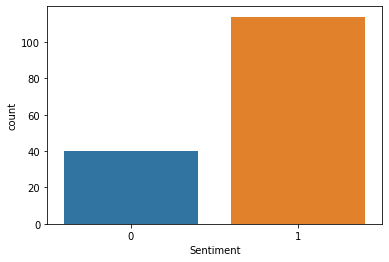

In [64]:
# plot the word count
sns.countplot(stock_df['Sentiment'])

**6**

- **Change the padding length to 15 and rerun the code. Verify that padding was successful**


In [65]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

**7**
- **Train the model using different embedding output dimension**

In [66]:
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 256))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         335872    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              394240    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 763,137
Trainable params: 763,137
Non-trainable params: 0
_________________________________________________________________


**8**

- **Use a pretrained BERT model to make a sentiment analysis predictions**

In [67]:
!{sys.executable} -m pip install transformers

In [68]:
# Use pipeline from transformer to perform specific task. 
# Mention sentiment analysis as task and pass in the string to it, to get the results
# We can specify tasks like topic modeling, Q and A, text summarization here.
from transformers import pipeline

nlp = pipeline('sentiment-analysis')

# Make prediction on the test data
pred = nlp(list(X_test))

# Since predicted value is a dictionary, get the label from the dict
prediction = []
for i in pred:
  prediction.append(i['label'])

# print the final results
for i in range(len(prediction[:3])):
  print("\n\nNews :\n\n", df[df.combined == X_test.values[i]].Text.item(), "\n\nOriginal value :\n\n",
      category[df[df.combined == X_test.values[i]].Sentiment.item()], "\n\nPredicted value :\n\n", prediction[i], "\n\n\n")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are 

ValueError: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length.